In [1]:
using Distributions
using Dates
using Printf

using LaTeXStrings
import PyPlot; plt=PyPlot
plt.rc("figure", dpi=120.0)
# plt.rc("figure", figsize=(6,4))
# plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=120.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
cbbPalette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
;

In [22]:
?plt.annotate

Annotate the point *xy* with text *s*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
s : str
    The text of the annotation.

xy : (float, float)
    The point *(x,y)* to annotate.

xytext : (float, float), optional
    The position *(x,y)* to place the text at.
    If *None*, defaults to *xy*.

xycoords : str, `.Artist`, `.Transform`, callable or tuple, optional

    The coordinate system that *xy* is given in. The following types
    of values are supported:

    - One of the following strings:

      =================   =============================================
      Value               Description
      =================   =============================================
      'figure points'     Points from the lower left of the figure
      'figure pixels'     Pixels from the lower

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base.GenericIOBuffer{Array{UInt8,1}}}, ::MIME{Symbol("text/plain")}, ::PyPlot.LazyHelp) at PyPlot.jl:28
└ @ PyPlot /Users/imolk/Library/Julia/alternative_depots/deconvolve/packages/PyPlot/KRYZs/src/PyPlot.jl:28


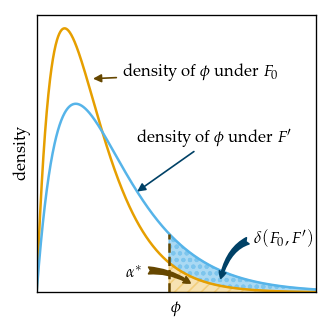

In [91]:
function pale_color(color)
    rgb = plt.matplotlib.colors.to_rgb(color)
    hsv = plt.matplotlib.colors.rgb_to_hsv(rgb)
    pale_hsv = [hsv[1], 0.2, 0.95]
    pale_rgb = plt.matplotlib.colors.hsv_to_rgb(pale_hsv)
    return pale_rgb
end
function dark_color(color)
    rgb = plt.matplotlib.colors.to_rgb(color)
    hsv = plt.matplotlib.colors.rgb_to_hsv(rgb)
    dark_hsv = [hsv[1], 1.0, 0.4]
    dark_rgb = plt.matplotlib.colors.hsv_to_rgb(dark_hsv)
    return dark_rgb
end

φ1 = Distributions.Gamma(2,0.5)
φ2 = Distributions.Gamma(2,0.7)
xx = range(0, stop=5, length=1000)
plt.plot(xx, pdf.(φ1, xx), label=L"p_{F_0}(\phi)", color=cbbPalette[1])
plt.plot(xx, pdf.(φ2, xx), label=L"p_{F'}(\phi)", color=cbbPalette[2])
α = 0.05
φthres = quantile(φ1, 1-α)
xover = range(φthres, stop=5, length=200)
plt.fill_between(xover, 0.0, pdf.(φ1, xover), color=cbbPalette[1], alpha=0.3, hatch="///")
plt.fill_between(xover, pdf.(φ1, xover), pdf.(φ2, xover), color=cbbPalette[2], alpha=0.5, hatch="ooo")
# draw the (1-α) quantile of the test statistic under F_0
plt.plot([φthres,φthres], [0,pdf(φ2, φthres)], "--", color=dark_color(cbbPalette[1]))

plt.annotate(
    L"density of $\phi$ under $F_0$",
    (0.95,pdf(φ1, 0.9)),
    (20, 0),
    xycoords="data",
    textcoords="offset points",
    arrowprops=Dict(
        :arrowstyle => "-|>",
        :color => dark_color(cbbPalette[1]),
    )
)

plt.annotate(
    L"density of $\phi$ under $F'$",
    (1.8,pdf(φ2, 1.8)),
    (0, 30),
    xycoords="data",
    textcoords="offset points",
    arrowprops=Dict(
        :arrowstyle => "-|>",
        :color => dark_color(cbbPalette[2]),
        :shrinkB => 0,
    )
)

plt.annotate(
    L"$\alpha^*$",
    (2.8,pdf(φ1, 2.8)/2),
    (-40, 5),
    xycoords="data",
    textcoords="offset points",
    arrowprops=Dict(
        :arrowstyle => "fancy",
        :color => dark_color(cbbPalette[1]),
        :edgecolor => "black",
        :connectionstyle => "arc3,rad=-0.2",
    )
)

xannot = 3.3
plt.annotate(
    L"$\delta(F_0,F')$",
    (xannot,(pdf(φ1, xannot) + pdf(φ2, xannot))/2),
    (20, 20),
    xycoords="data",
    textcoords="offset points",
    arrowprops=Dict(
        :arrowstyle => "fancy",
        :color => dark_color(cbbPalette[2]),
        :shrinkB => 0,
        :connectionstyle => "arc3,rad=0.5",
    )
)

plt.xticks([])
plt.yticks([])
plt.xlabel(L"\phi")
plt.ylabel("density")
plt.ylim(0)
plt.xlim(0,5)
plt.gcf().set_size_inches(3,3)
plt.savefig("../figures/pdiff.pdf", bbox_inches="tight")
plt.savefig("../figures/pdiff.png", bbox_inches="tight", dpi=300)
;